## Getting data from binance api

## importing necessary libraries

In [1]:
import requests
import pandas as pd
from datetime import datetime, timedelta

In [2]:
# Function to get historical OHLC data from Binance API (no API key required)
def get_binance_ohlc_data(symbol, interval, start_time, end_time=None):
    """
    Retrieve historical OHLC data from Binance API without API key.
    Args:
    - symbol: The symbol for which you want the data (e.g., 'BTCUSDT').
    - interval: Time interval for the OHLC data (e.g., '1d', '1h', '5m').
    - start_time: Start date for the data in string format (e.g., '1 Jan, 2024').
    - end_time: End date for the data in string format (optional, e.g., '31 Dec, 2024').
    
    Returns:
    - DataFrame with historical OHLC data.
    """
    # Convert start_time and end_time to timestamps (milliseconds)
    start_timestamp = int(datetime.strptime(start_time, '%d %b, %Y').timestamp() * 1000)
    if end_time:
        end_timestamp = int(datetime.strptime(end_time, '%d %b, %Y').timestamp() * 1000)
    else:
        end_timestamp = int(datetime.now().timestamp() * 1000)

    # Binance API endpoint for OHLC data (candlestick data)
    url = f'https://api.binance.com/api/v3/klines'

    # Request parameters
    params = {
        'symbol': symbol,
        'interval': interval,
        'startTime': start_timestamp,
        'endTime': end_timestamp,
        'limit': 1000  # Max number of data points per request
    }

    # Send GET request to Binance API
    response = requests.get(url, params=params)

    # Check if the request was successful
    if response.status_code == 200:
        # Extract data from response
        ohlc_data = response.json()

        # Convert the data into a pandas DataFrame
        df = pd.DataFrame(ohlc_data, columns=['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close Time', 'Quote Asset Volume', 'Number of Trades', 'Taker Buy Base Asset Volume', 'Taker Buy Quote Asset Volume', 'Ignore'])

        # Convert timestamp to datetime format and keep 'Date' as a regular column
        df['Date'] = pd.to_datetime(df['Timestamp'], unit='ms')

        # Drop the unnecessary columns
        df.drop(columns=['Timestamp', 'Close Time', 'Quote Asset Volume', 'Number of Trades', 'Taker Buy Base Asset Volume', 'Taker Buy Quote Asset Volume', 'Ignore'], inplace=True)

        # No longer setting 'Date' as index
        return df
    else:
        print(f"Error: {response.status_code}")
        return None

# Example usage:
symbol = 'BTCUSDT'  # Bitcoin to USDT trading pair
interval = '1d'  # 1-day candlesticks

# Calculate the date 6 months ago
end_time = datetime.now().strftime('%d %b, %Y')  # Today's date
start_time = (datetime.now() - timedelta(days=180)).strftime('%d %b, %Y')  # 6 months ago

# Fetch historical data
df = get_binance_ohlc_data(symbol, interval, start_time, end_time)

if df is not None:
    # Show the first few rows of the data
    print(df.head())

    # Optional: Save to CSV for later use
    df.to_csv('bitcoin 6months data.csv', index=False)  # Save data without the index


             Open            High             Low           Close  \
0  61806.01000000  62487.81000000  60712.00000000  60864.99000000   
1  60864.98000000  62389.22000000  60606.63000000  61706.47000000   
2  61706.46000000  62225.31000000  60063.00000000  60427.84000000   
3  60427.84000000  61224.00000000  60383.77000000  60986.68000000   
4  60986.68000000  63058.76000000  60712.21000000  62772.01000000   

           Volume       Date  
0  22485.66463000 2024-06-26  
1  18344.28631000 2024-06-27  
2  24821.19255000 2024-06-28  
3  11509.55904000 2024-06-29  
4  17326.30136000 2024-06-30  


In [3]:
df

,Open,High,Low,Close,Volume,Date
0,61806.01000000,62487.81000000,60712.00000000,60864.99000000,22485.66463000,2024-06-26
1,60864.98000000,62389.22000000,60606.63000000,61706.47000000,18344.28631000,2024-06-27
2,61706.46000000,62225.31000000,60063.00000000,60427.84000000,24821.19255000,2024-06-28
3,60427.84000000,61224.00000000,60383.77000000,60986.68000000,11509.55904000,2024-06-29
4,60986.68000000,63058.76000000,60712.21000000,62772.01000000,17326.30136000,2024-06-30
...,...,...,...,...,...,...
175,106133.74000000,106524.98000000,100000.00000000,100204.01000000,50307.99755000,2024-12-18
176,100204.01000000,102800.11000000,95700.00000000,97461.86000000,55147.39800000,2024-12-19
177,97461.86000000,98233.00000000,92232.54000000,97805.44000000,62884.13570000,2024-12-20
178,97805.44000000,99540.61000000,96398.39000000,97291.99000000,23483.54143000,2024-12-21


In [4]:
# Reorder columns to place 'Date' first
df = df[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]

# Check the result
df.head()


,Date,Open,High,Low,Close,Volume
0,2024-06-26,61806.01000000,62487.81000000,60712.00000000,60864.99000000,22485.66463000
1,2024-06-27,60864.98000000,62389.22000000,60606.63000000,61706.47000000,18344.28631000
2,2024-06-28,61706.46000000,62225.31000000,60063.00000000,60427.84000000,24821.19255000
3,2024-06-29,60427.84000000,61224.00000000,60383.77000000,60986.68000000,11509.55904000
4,2024-06-30,60986.68000000,63058.76000000,60712.21000000,62772.01000000,17326.30136000


## shape of the data

In [5]:
df.shape

(180, 6)

## columns of the data

In [6]:
print(df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')


## statistical information

In [7]:
df.describe()

,Date
count,180
mean,2024-09-23 12:00:00
min,2024-06-26 00:00:00
25%,2024-08-09 18:00:00
50%,2024-09-23 12:00:00
75%,2024-11-07 06:00:00
max,2024-12-22 00:00:00


## overall info of the data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    180 non-null    datetime64[ns]
 1   Open    180 non-null    object        
 2   High    180 non-null    object        
 3   Low     180 non-null    object        
 4   Close   180 non-null    object        
 5   Volume  180 non-null    object        
dtypes: datetime64[ns](1), object(5)
memory usage: 8.6+ KB


## datatype conversion

In [9]:
#object to numerical

In [10]:
columns_to_convert = ['Open', 'High', 'Low','Close','Volume']

# Convert each column to float
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Display the data types of the updated columns
df.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume           float64
dtype: object

In [11]:
# Convert the 'volume' column from float to int
df['Volume'] = df['Volume'].astype(int)

# Display the updated DataFrame
df.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume             int32
dtype: object

## statistical data

In [12]:
df.describe()

,Date,Open,High,Low,Close,Volume
count,180,180.000000,180.000000,180.000000,180.000000,180.000000
mean,2024-09-23 12:00:00,70585.558611,72101.229333,69217.453944,70771.006611,31544.355556
min,2024-06-26 00:00:00,53962.970000,54850.000000,49000.000000,53962.970000,7721.000000
25%,2024-08-09 18:00:00,60323.297500,61415.517500,58773.602500,60323.290000,21225.250000
50%,2024-09-23 12:00:00,64241.345000,65607.470000,62901.690000,64445.350000,27832.000000
75%,2024-11-07 06:00:00,75643.465000,76862.492500,74700.750000,76020.862500,37174.000000
max,2024-12-22 00:00:00,106133.740000,108353.000000,105321.490000,106133.740000,162065.000000
std,NaN,14961.222268,15324.625887,14661.389973,15058.337308,19824.983814


## Checking duplicates

In [13]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
175    False
176    False
177    False
178    False
179    False
Length: 180, dtype: bool

In [14]:
df.duplicated().sum()

0

In [15]:
#there are no duplicates


## Checking missing values

In [16]:
df.isnull()

,Date,Open,High,Low,Close,Volume
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
175,False,False,False,False,False,False
176,False,False,False,False,False,False
177,False,False,False,False,False,False
178,False,False,False,False,False,False


In [17]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [18]:
#there are no nulls in the dataset

## Checking outliers

In [19]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2024-06-26,61806.01,62487.81,60712.00,60864.99,22485
1,2024-06-27,60864.98,62389.22,60606.63,61706.47,18344
2,2024-06-28,61706.46,62225.31,60063.00,60427.84,24821
3,2024-06-29,60427.84,61224.00,60383.77,60986.68,11509
4,2024-06-30,60986.68,63058.76,60712.21,62772.01,17326


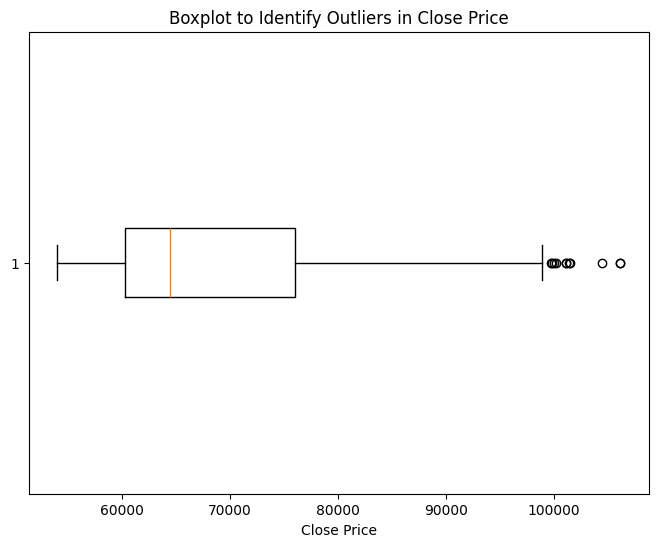

In [20]:
import matplotlib.pyplot as plt

# Boxplot for Closing Price to Identify Outliers
plt.figure(figsize=(8, 6))
plt.boxplot(df['Close'], vert=False)
plt.title('Boxplot to Identify Outliers in Close Price')
plt.xlabel('Close Price')

plt.show()

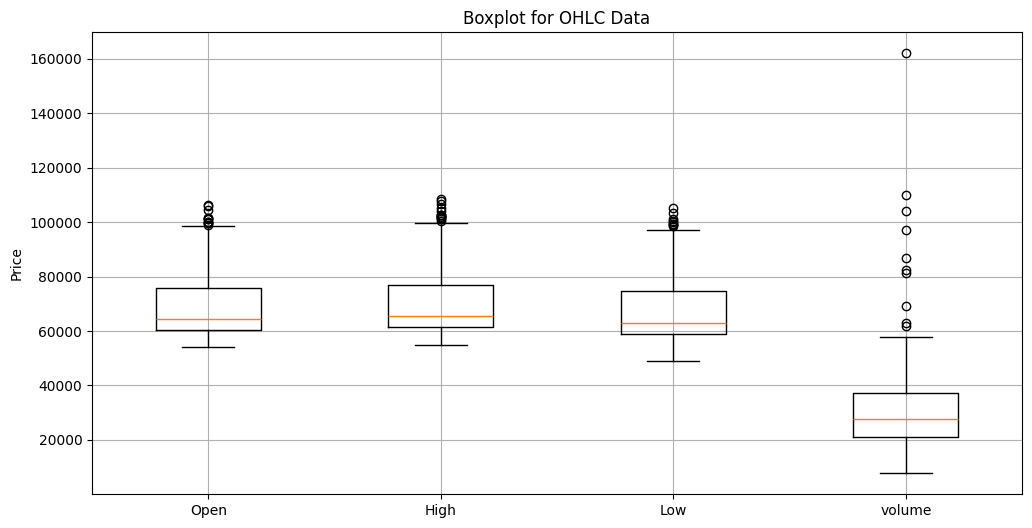

In [21]:
# Boxplot for Multiple Columns (OHLC)
plt.figure(figsize=(12, 6))
plt.boxplot([df['Open'],df['High'], df['Low'],df['Volume']], vert=True, labels=['Open', 'High', 'Low','volume'])
plt.title('Boxplot for OHLC Data')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [22]:
#using satistical methods

## using iqr

In [23]:
# Step 1: Calculate Q1, Q3, and IQR for each column
columns_to_check = ['Close', 'High', 'Low', 'Open', 'Volume']
Q1 = df[columns_to_check].quantile(0.25)
Q3 = df[columns_to_check].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define outliers based on the IQR method
outlier_condition = ((df[columns_to_check] < (Q1 - 1.5 * IQR)) | 
                     (df[columns_to_check] > (Q3 + 1.5 * IQR)))

# Count outliers before replacement
outliers_count = outlier_condition.sum().sum()  # Total count of outliers
outliers_count

56

## Handling outliers

In [24]:
df_original = df.copy() 

In [25]:
import numpy as np
for column in df.select_dtypes(include=[float, int]):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Replace outliers with median
    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound),
                          df[column].median(), df[column])
## making outliers into useful values by using median throughout outliers.



In [26]:
for column in df.select_dtypes(include=[float, int]):
    # Calculate IQR bounds
    Q1 = df_original[column].quantile(0.25)
    Q3 = df_original[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Create a mask for where values were replaced
    replaced = ((df_original[column] < lower_bound) | (df_original[column] > upper_bound)) & (df[column] == df[column].median())
    # Display rows where replacement occurred
    print(f"Outliers replaced in column '{column}':")
    print(df[replaced])
## replacement code- conforms the before and after values of outliers with clear explaination and also leaves the connection with copy folder.


Outliers replaced in column 'Open':
Empty DataFrame
Columns: [Date, Open, High, Low, Close, Volume]
Index: []
Outliers replaced in column 'High':
Empty DataFrame
Columns: [Date, Open, High, Low, Close, Volume]
Index: []
Outliers replaced in column 'Low':
Empty DataFrame
Columns: [Date, Open, High, Low, Close, Volume]
Index: []
Outliers replaced in column 'Close':
Empty DataFrame
Columns: [Date, Open, High, Low, Close, Volume]
Index: []
Outliers replaced in column 'Volume':
Empty DataFrame
Columns: [Date, Open, High, Low, Close, Volume]
Index: []


In [27]:
for column in df.select_dtypes(include=[float, int]):
    # Calculate IQR bounds on original data
    Q1 = df_original[column].quantile(0.25)
    Q3 = df_original[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Count outliers in original and modified data
    original_outliers = ((df_original[column] < lower_bound) | (df_original[column] > upper_bound)).sum()
    modified_outliers = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()
    print(f"{column}: Outliers before = {original_outliers}, after = {modified_outliers}")
## checking of the outliers replacement.

Open: Outliers before = 12, after = 0
High: Outliers before = 14, after = 0
Low: Outliers before = 9, after = 0
Close: Outliers before = 11, after = 0
Volume: Outliers before = 10, after = 0


## Decomposition

In [28]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2024-06-26,61806.01,62487.81,60712.00,60864.99,22485.0
1,2024-06-27,60864.98,62389.22,60606.63,61706.47,18344.0
2,2024-06-28,61706.46,62225.31,60063.00,60427.84,24821.0
3,2024-06-29,60427.84,61224.00,60383.77,60986.68,11509.0
4,2024-06-30,60986.68,63058.76,60712.21,62772.01,17326.0


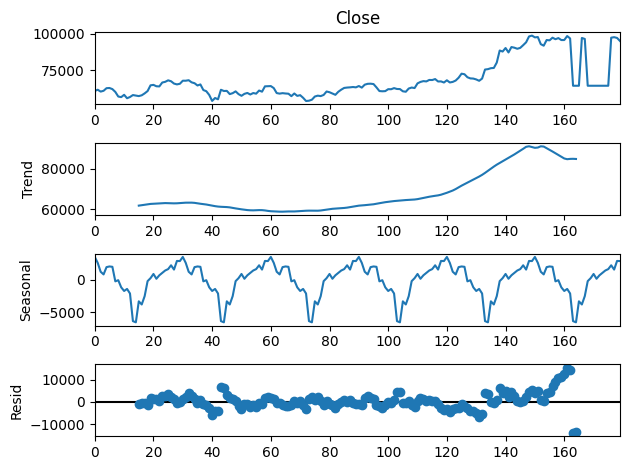

In [29]:
# Import necessary libraries
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Decompose the time series (adjust period based on your data's frequency)
decomposition = sm.tsa.seasonal_decompose(df['Close'], model='additive', period=30)  # Use period=30 for daily data

# Plot the decomposition components
decomposition.plot()
plt.show()

In [30]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2024-06-26,61806.01,62487.81,60712.00,60864.99,22485.0
1,2024-06-27,60864.98,62389.22,60606.63,61706.47,18344.0
2,2024-06-28,61706.46,62225.31,60063.00,60427.84,24821.0
3,2024-06-29,60427.84,61224.00,60383.77,60986.68,11509.0
4,2024-06-30,60986.68,63058.76,60712.21,62772.01,17326.0


## relationship between the price movements

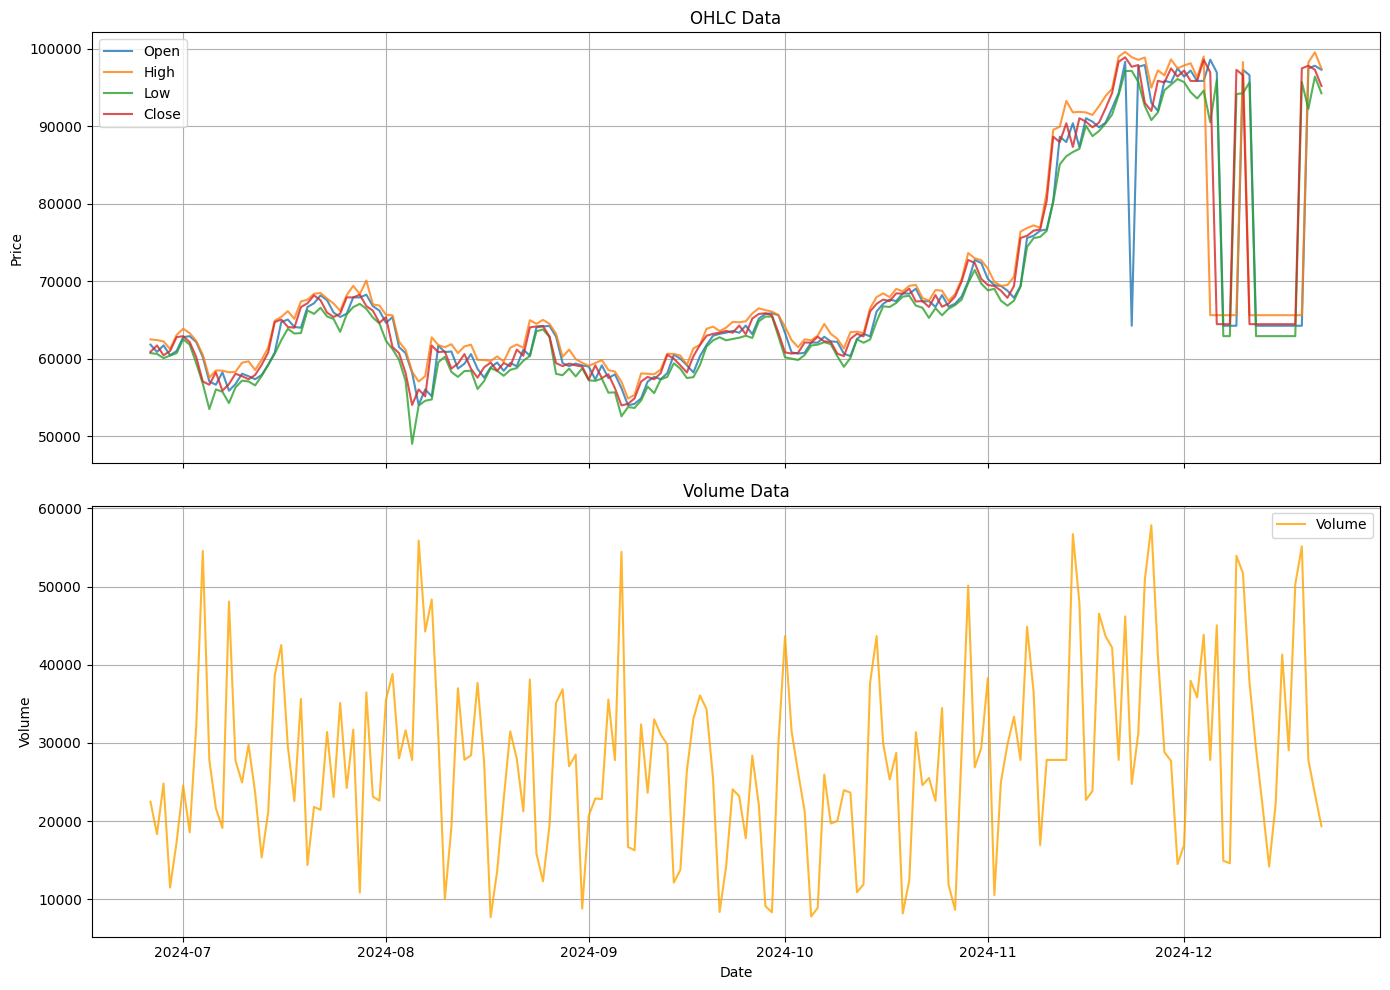

In [31]:
import pandas as pd
import matplotlib.pyplot as plt


# Set Date as index
df.set_index('Date', inplace=True)

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Plot OHLC Data
axs[0].plot(df.index, df['Open'], label='Open', alpha=0.8)
axs[0].plot(df.index, df['High'], label='High', alpha=0.8)
axs[0].plot(df.index, df['Low'], label='Low', alpha=0.8)
axs[0].plot(df.index, df['Close'], label='Close', alpha=0.8)
axs[0].set_title('OHLC Data')
axs[0].set_ylabel('Price')
axs[0].legend()
axs[0].grid(True)

# Plot Volume Data
axs[1].plot(df.index, df['Volume'], label='Volume', color='orange', alpha=0.8)
axs[1].set_title('Volume Data')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Volume')
axs[1].legend()
axs[1].grid(True)

# Show plot
plt.tight_layout()
plt.show()



Decomposition for Open


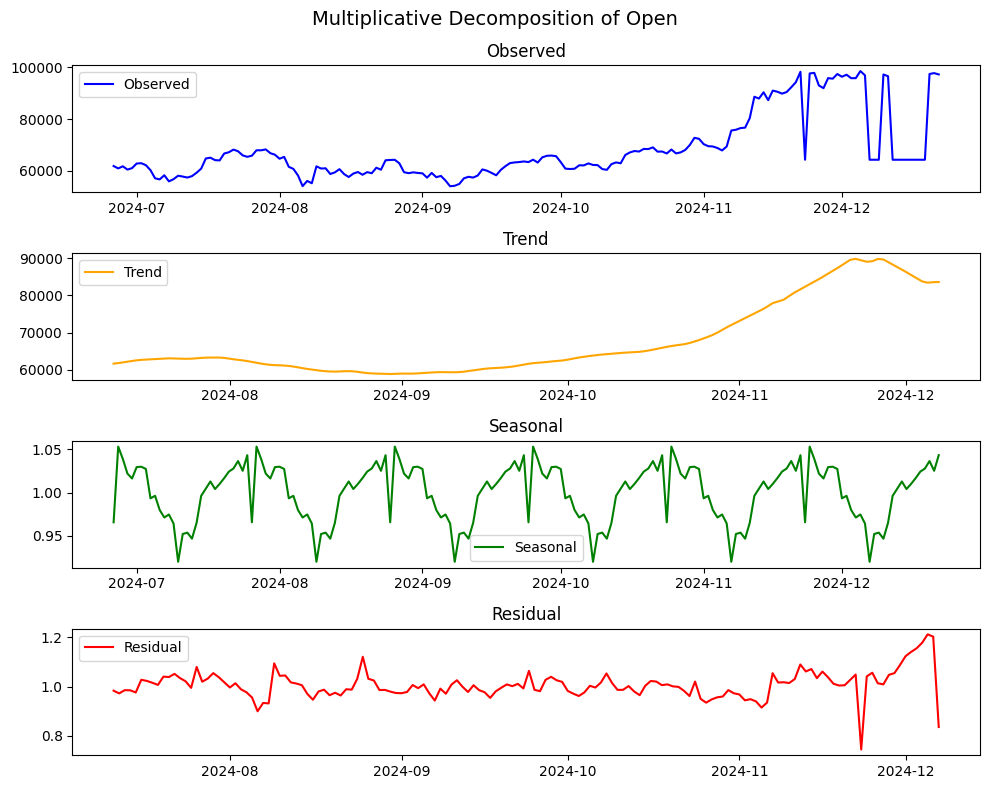


Decomposition for High


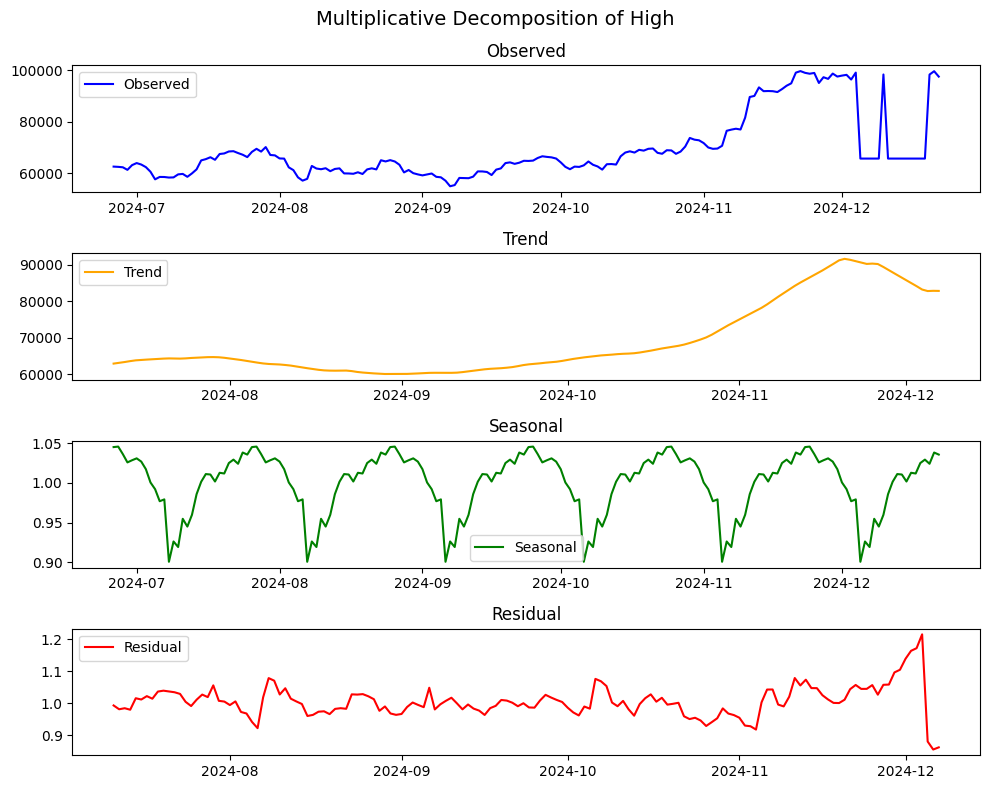


Decomposition for Low


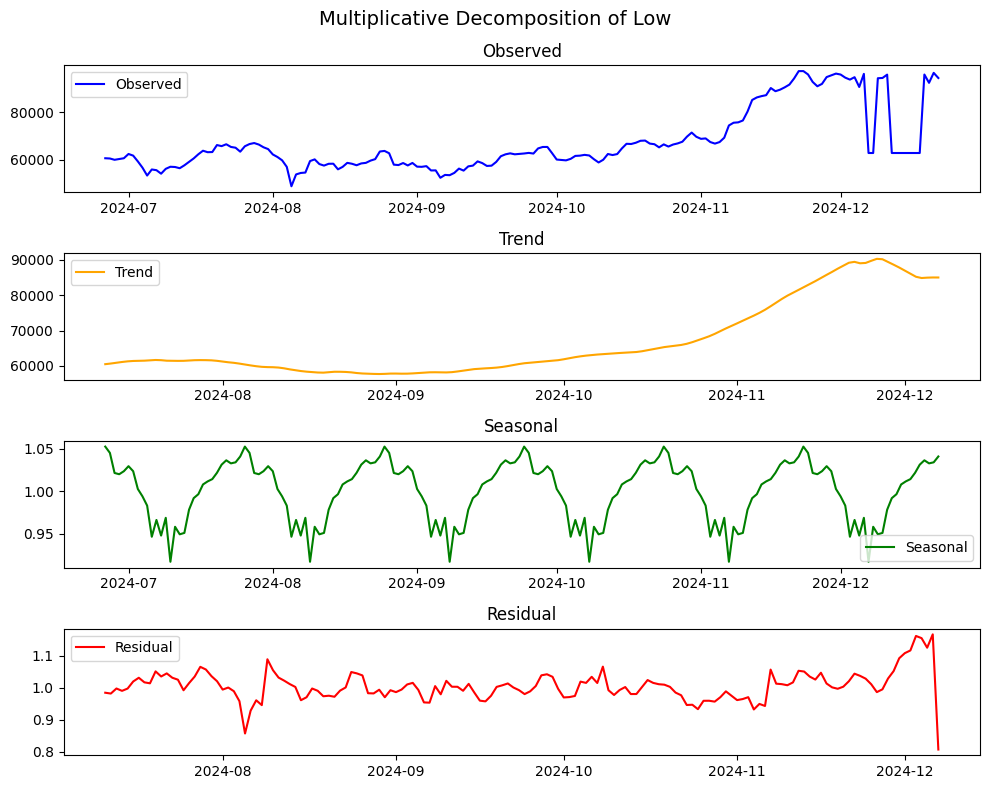


Decomposition for Close


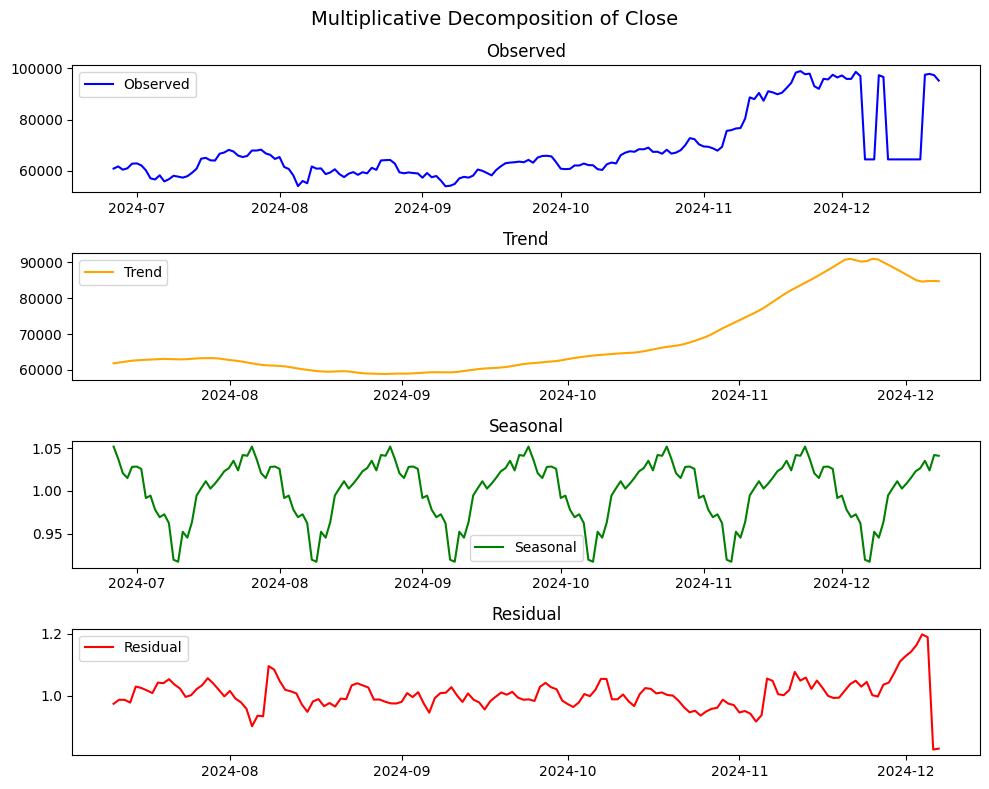

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


# Perform Multiplicative Decomposition for OHLC columns
columns = ['Open', 'High', 'Low', 'Close']

for col in columns:
    print(f"\nDecomposition for {col}")
    
    # Perform decomposition
    result = seasonal_decompose(df[col], model='multiplicative', period=30)  # Adjust period for seasonality

    # Plot decomposition
    plt.figure(figsize=(10, 8))
    plt.suptitle(f"Multiplicative Decomposition of {col}", fontsize=14)
    
    plt.subplot(4, 1, 1)
    plt.plot(result.observed, label='Observed', color='blue')
    plt.title('Observed')
    plt.legend()
    
    plt.subplot(4, 1, 2)
    plt.plot(result.trend, label='Trend', color='orange')
    plt.title('Trend')
    plt.legend()
    
    plt.subplot(4, 1, 3)
    plt.plot(result.seasonal, label='Seasonal', color='green')
    plt.title('Seasonal')
    plt.legend()
    
    plt.subplot(4, 1, 4)
    plt.plot(result.resid, label='Residual', color='red')
    plt.title('Residual')
    plt.legend()
    
    plt.tight_layout()
    plt.show()


## checking outliers in residuals after decomposing


Outlier Detection for Residuals of Open
Number of outliers in residuals for Open: 5
Outliers:
 Date
2024-11-23    0.743818
2024-12-04    1.178252
2024-12-05    1.212678
2024-12-06    1.203290
2024-12-07    0.835437
Name: resid, dtype: float64


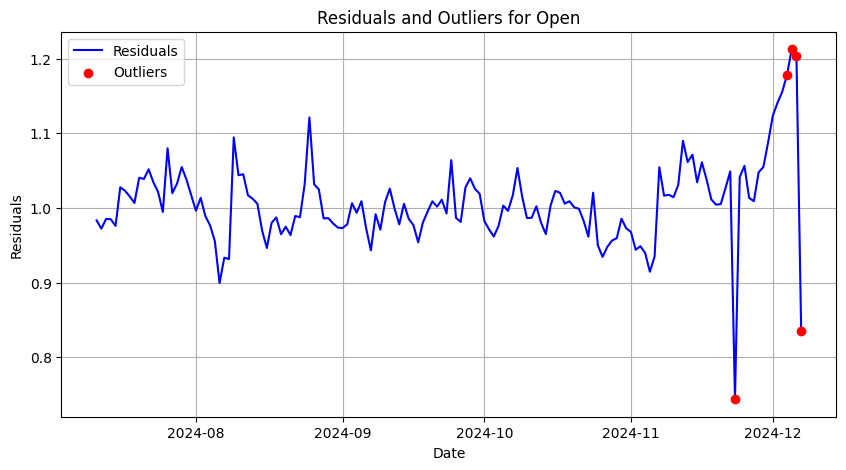


Outlier Detection for Residuals of High
Number of outliers in residuals for High: 4
Outliers:
 Date
2024-12-02    1.163244
2024-12-03    1.171515
2024-12-04    1.214761
2024-12-06    0.854782
Name: resid, dtype: float64


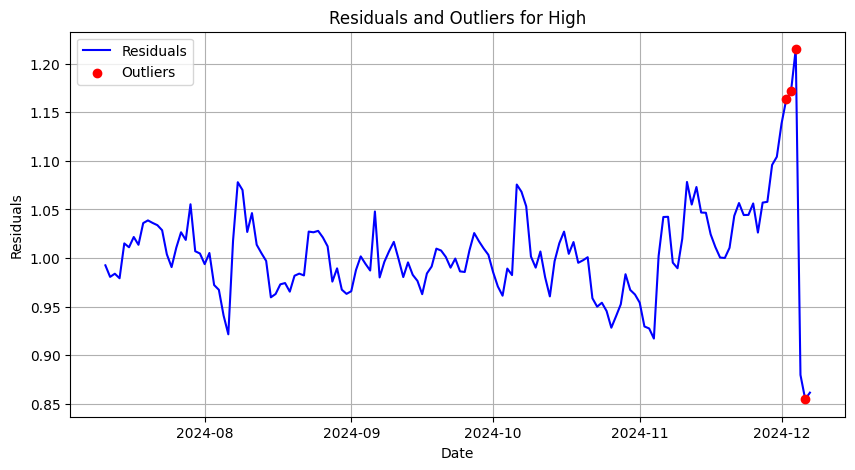


Outlier Detection for Residuals of Low
Number of outliers in residuals for Low: 5
Outliers:
 Date
2024-08-05    0.857370
2024-12-03    1.160985
2024-12-04    1.154167
2024-12-06    1.166004
2024-12-07    0.807525
Name: resid, dtype: float64


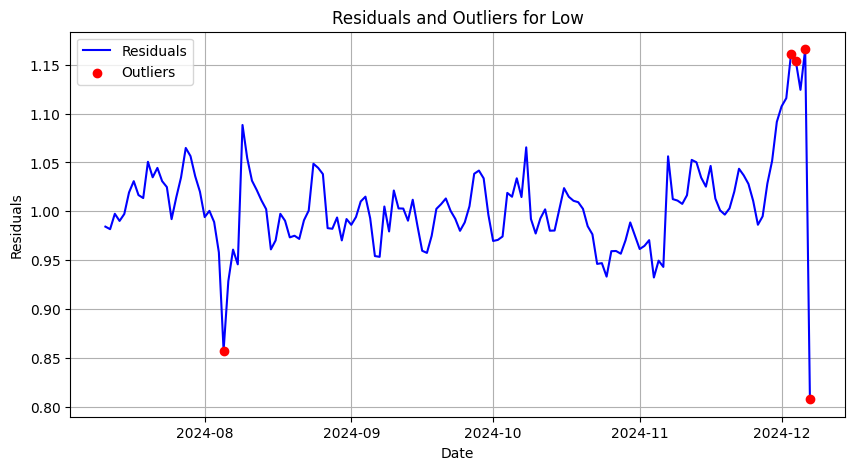


Outlier Detection for Residuals of Close
Number of outliers in residuals for Close: 5
Outliers:
 Date
2024-12-03    1.163552
2024-12-04    1.197575
2024-12-05    1.188293
2024-12-06    0.826340
2024-12-07    0.829290
Name: resid, dtype: float64


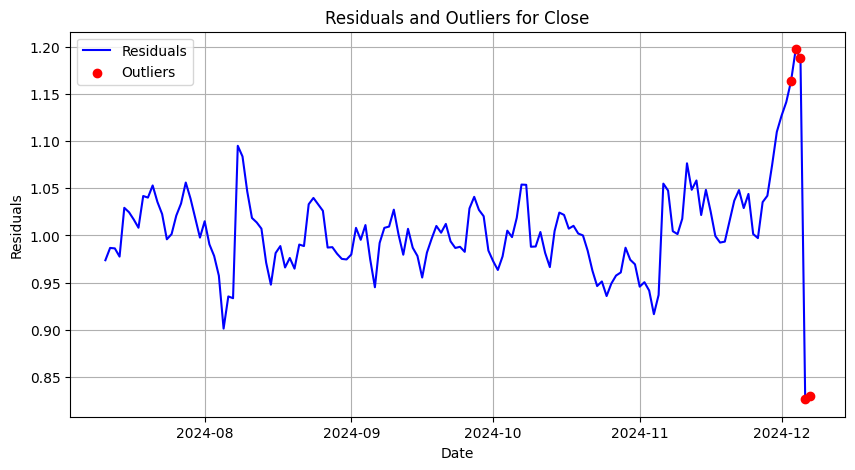


Outlier Detection for Residuals of Volume
Number of outliers in residuals for Volume: 0
Outliers:
 Series([], Name: resid, dtype: float64)


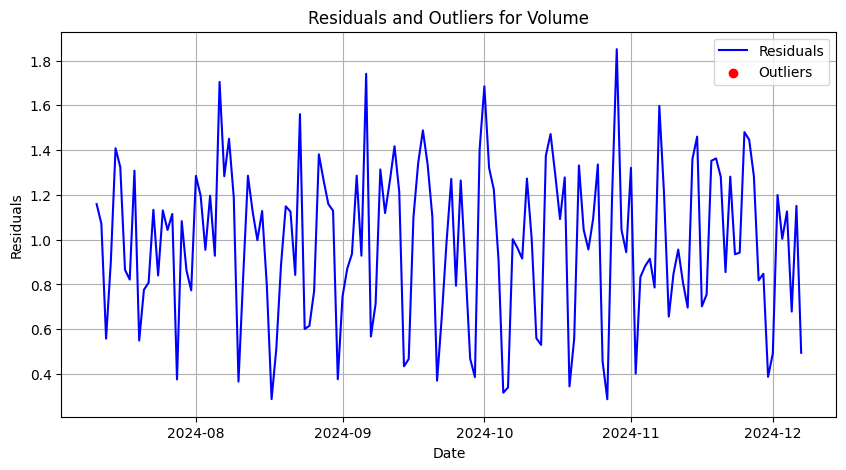

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import zscore


# Perform Multiplicative Decomposition for OHLC and Volume columns
columns = ['Open', 'High', 'Low', 'Close', 'Volume']

for col in columns:
    print(f"\nOutlier Detection for Residuals of {col}")
    
    # Perform decomposition
    result = seasonal_decompose(df[col], model='multiplicative', period=30)  # Adjust period for seasonality
    
    # Extract residuals
    residuals = result.resid.dropna()
    
    # Detect Outliers using Z-score
    residuals_zscore = zscore(residuals)
    outliers = residuals[np.abs(residuals_zscore) > 3]
    
    # Print Results
    print(f"Number of outliers in residuals for {col}: {len(outliers)}")
    print("Outliers:\n", outliers)
    
    # Plot residuals and outliers
    plt.figure(figsize=(10, 5))
    plt.plot(residuals, label='Residuals', color='blue')
    plt.scatter(outliers.index, outliers, color='red', label='Outliers', zorder=3)
    plt.title(f"Residuals and Outliers for {col}")
    plt.xlabel('Date')
    plt.ylabel('Residuals')
    plt.legend()
    plt.grid()
    plt.show()


## replacing residual outliers


Outlier Handling for Residuals of Open
Number of outliers detected in Open: 5
Replaced outliers with median: 1.0038035312853204


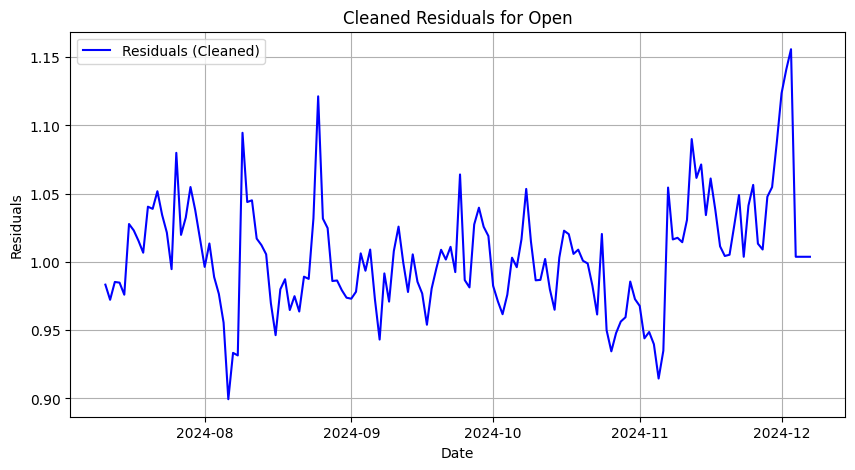


Outlier Handling for Residuals of High
Number of outliers detected in High: 4
Replaced outliers with median: 1.0013325144490948


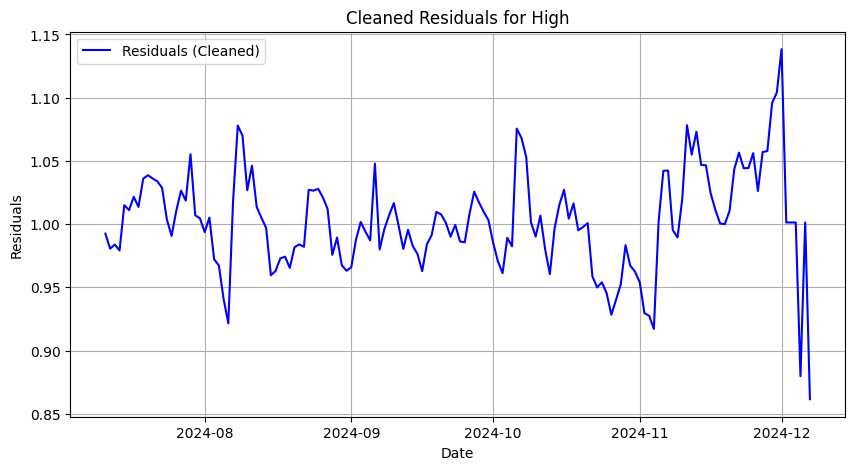


Outlier Handling for Residuals of Low
Number of outliers detected in Low: 5
Replaced outliers with median: 1.002030293521424


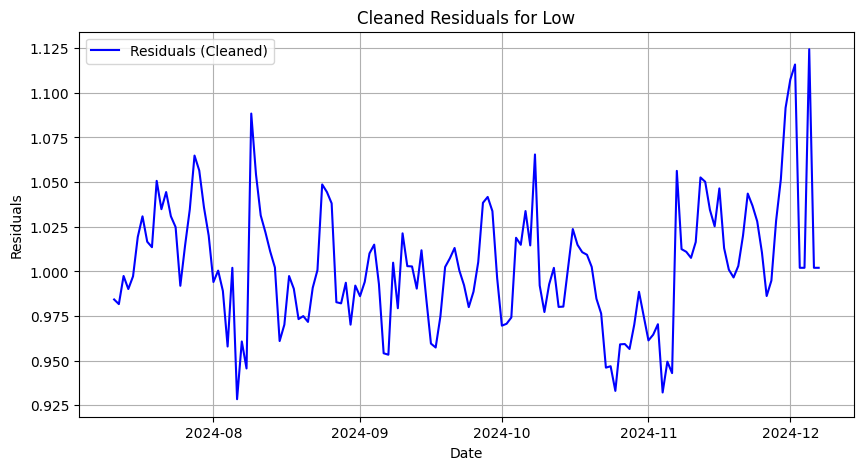


Outlier Handling for Residuals of Close
Number of outliers detected in Close: 5
Replaced outliers with median: 1.0014676222594194


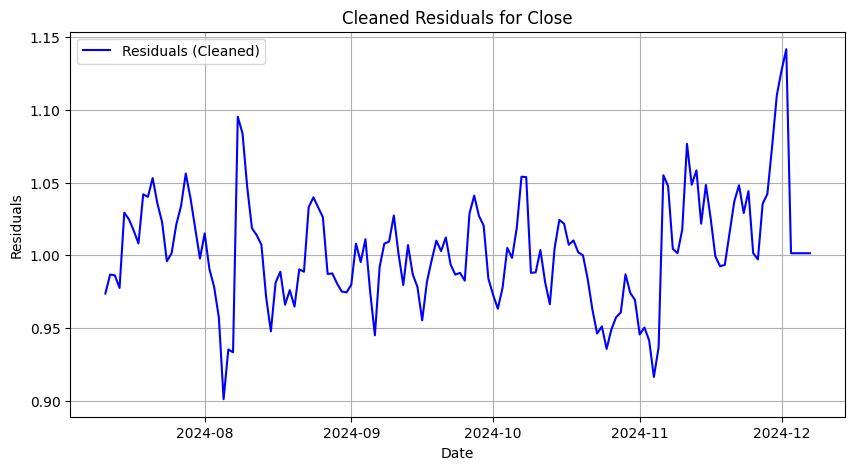


Outlier Handling for Residuals of Volume
Number of outliers detected in Volume: 0
No outliers found in Volume.


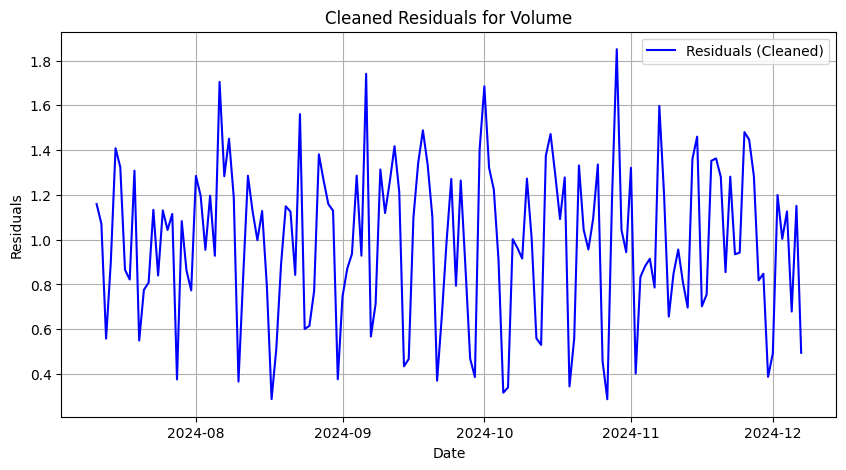


Verifying that there are no remaining outliers...
Outliers still exist in Open: 2
Outliers still exist in High: 3
Outliers still exist in Low: 2
Outliers still exist in Close: 2
No outliers remaining in residuals for Volume.

Outlier replacement and verification complete!


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import zscore

# Perform Multiplicative Decomposition for OHLC and Volume columns
columns = ['Open', 'High', 'Low', 'Close', 'Volume']

# Dictionary to store cleaned residuals
cleaned_residuals = {}

for col in columns:
    print(f"\nOutlier Handling for Residuals of {col}")
    
    # Perform decomposition
    result = seasonal_decompose(df[col], model='multiplicative', period=30)  # Adjust period if needed
    
    # Extract residuals and drop NaN
    residuals = result.resid.dropna()
    
    # Detect Outliers using Z-score
    residuals_zscore = zscore(residuals)
    outliers = residuals[np.abs(residuals_zscore) > 3]
    print(f"Number of outliers detected in {col}: {len(outliers)}")
    
    if len(outliers) > 0:
        # Replace outliers with the median of the residuals
        median_value = residuals.median()
        residuals.loc[outliers.index] = median_value
        print(f"Replaced outliers with median: {median_value}")
    else:
        print(f"No outliers found in {col}.")
    
    # Store cleaned residuals for verification
    cleaned_residuals[col] = residuals
    
    # Plot residuals after replacing outliers
    plt.figure(figsize=(10, 5))
    plt.plot(residuals, label='Residuals (Cleaned)', color='blue')
    plt.title(f"Cleaned Residuals for {col}")
    plt.xlabel('Date')
    plt.ylabel('Residuals')
    plt.legend()
    plt.grid()
    plt.show()

# Verification: Check if Outliers Remain
print("\nVerifying that there are no remaining outliers...")
for col in columns:
    residuals_cleaned = cleaned_residuals[col]
    
    # Recalculate Z-scores
    residuals_zscore = zscore(residuals_cleaned)
    outliers = residuals_cleaned[np.abs(residuals_zscore) > 3]
    
    # Verification
    if len(outliers) == 0:
        print(f"No outliers remaining in residuals for {col}.")
    else:
        print(f"Outliers still exist in {col}: {len(outliers)}")

print("\nOutlier replacement and verification complete!")


In [35]:
#now the data is very clean without any outliers

## Checking stationarity:

In [36]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller

# Function to check stationarity using ADF test
def check_stationarity(df, columns):
    results = {}
    
    for col in columns:
        print(f"\nChecking Stationarity for '{col}'")
        
        # Perform ADF Test
        result = adfuller(df[col].dropna(), autolag='AIC')
        adf_statistic = result[0]
        p_value = result[1]
        critical_values = result[4]
        
        # Print Results
        print(f"ADF Statistic: {adf_statistic}")
        print(f"P-Value: {p_value}")
        print("Critical Values:")
        for key, value in critical_values.items():
            print(f"   {key}: {value}")
        
        # Conclusion
        if p_value < 0.05:
            print(f"Result: '{col}' is stationary (Reject null hypothesis).")
        else:
            print(f"Result: '{col}' is NOT stationary (Fail to reject null hypothesis).")
        
        results[col] = {'ADF Statistic': adf_statistic, 'P-Value': p_value, 'Stationary': p_value < 0.05}
    
    return results

# List of columns to check
columns = ['Open', 'High', 'Low', 'Close', 'Volume']

# Check Stationarity
stationarity_results = check_stationarity(df, columns)

# Print Summary
print("\nStationarity Summary:")
for col, result in stationarity_results.items():
    status = "Stationary" if result['Stationary'] else "Not Stationary"
    print(f"{col}: {status}")



Checking Stationarity for 'Open'
ADF Statistic: -1.1033471216176456
P-Value: 0.7137352675367551
Critical Values:
   1%: -3.4703698981001665
   5%: -2.8791138497902193
   10%: -2.576139407751488
Result: 'Open' is NOT stationary (Fail to reject null hypothesis).

Checking Stationarity for 'High'
ADF Statistic: -1.4143130922597358
P-Value: 0.5753953330012229
Critical Values:
   1%: -3.470616369591229
   5%: -2.8792214018977655
   10%: -2.57619681359045
Result: 'High' is NOT stationary (Fail to reject null hypothesis).

Checking Stationarity for 'Low'
ADF Statistic: -1.063130566075837
P-Value: 0.729548915456397
Critical Values:
   1%: -3.470616369591229
   5%: -2.8792214018977655
   10%: -2.57619681359045
Result: 'Low' is NOT stationary (Fail to reject null hypothesis).

Checking Stationarity for 'Close'
ADF Statistic: -0.9537224891433969
P-Value: 0.7697667550213942
Critical Values:
   1%: -3.470616369591229
   5%: -2.8792214018977655
   10%: -2.57619681359045
Result: 'Close' is NOT stati

## Transformation non stationarity to stationarity(using differencing):

In [37]:
#code to transform the data from non-statinarity to stationary and rechecking the stationarity 
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller

# Function to check stationarity using ADF test
def check_stationarity(df, columns):
    results = {}
    for col in columns:
        print(f"\nChecking Stationarity for '{col}'")
        
        # Perform ADF Test
        result = adfuller(df[col].dropna(), autolag='AIC')
        adf_statistic = result[0]
        p_value = result[1]
        critical_values = result[4]
        
        # Print Results
        print(f"ADF Statistic: {adf_statistic}")
        print(f"P-Value: {p_value}")
        print("Critical Values:")
        for key, value in critical_values.items():
            print(f"   {key}: {value}")
        
        # Conclusion
        if p_value < 0.05:
            print(f"Result: '{col}' is stationary (Reject null hypothesis).")
        else:
            print(f"Result: '{col}' is NOT stationary (Fail to reject null hypothesis).")
        
        results[col] = {'ADF Statistic': adf_statistic, 'P-Value': p_value, 'Stationary': p_value < 0.05}
    return results

# Perform Transformations
non_stationary_cols = ['Open', 'Low', 'Close', 'Volume']  # Identified as non-stationary earlier
transformed_df = df.copy()

# Apply differencing to non-stationary columns
for col in non_stationary_cols:
    transformed_df[col] = df[col].diff().dropna()  # First-order differencing
    print(f"Applied differencing to '{col}'.")

# Drop NaNs introduced by differencing
transformed_df = transformed_df.dropna()

# Recheck Stationarity
print("\nRechecking Stationarity After Transformations:")
columns_to_check = ['Open', 'High', 'Low', 'Close', 'Volume']
stationarity_results = check_stationarity(transformed_df, columns_to_check)

# Print Summary
print("\nStationarity Summary After Transformations:")
for col, result in stationarity_results.items():
    status = "Stationary" if result['Stationary'] else "Not Stationary"
    print(f"{col}: {status}")


Applied differencing to 'Open'.
Applied differencing to 'Low'.
Applied differencing to 'Close'.
Applied differencing to 'Volume'.

Rechecking Stationarity After Transformations:

Checking Stationarity for 'Open'
ADF Statistic: -4.711923706262223
P-Value: 7.991802432506646e-05
Critical Values:
   1%: -3.47086589632514
   5%: -2.879330279087651
   10%: -2.57625492712671
Result: 'Open' is stationary (Reject null hypothesis).

Checking Stationarity for 'High'
ADF Statistic: -1.401964805659373
P-Value: 0.5813338043411648
Critical Values:
   1%: -3.47086589632514
   5%: -2.879330279087651
   10%: -2.57625492712671
Result: 'High' is NOT stationary (Fail to reject null hypothesis).

Checking Stationarity for 'Low'
ADF Statistic: -3.8326283384220137
P-Value: 0.0025905816216569497
Critical Values:
   1%: -3.470616369591229
   5%: -2.8792214018977655
   10%: -2.57619681359045
Result: 'Low' is stationary (Reject null hypothesis).

Checking Stationarity for 'Close'
ADF Statistic: -3.819738873806602

In [38]:
#now the whole data is stationary after verification

## Checking for autocorrelation:

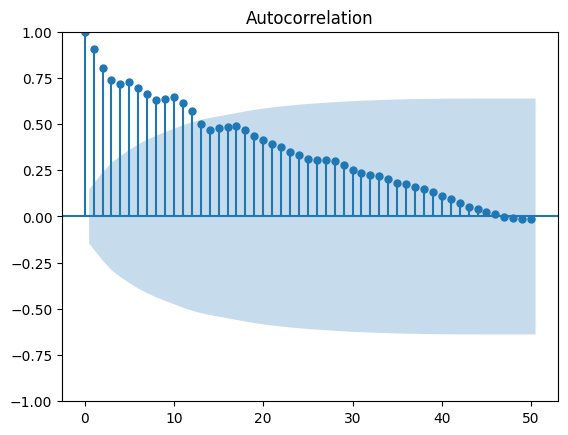

C:\Users\SREE GANESHA\anaconda3\envs\automation\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


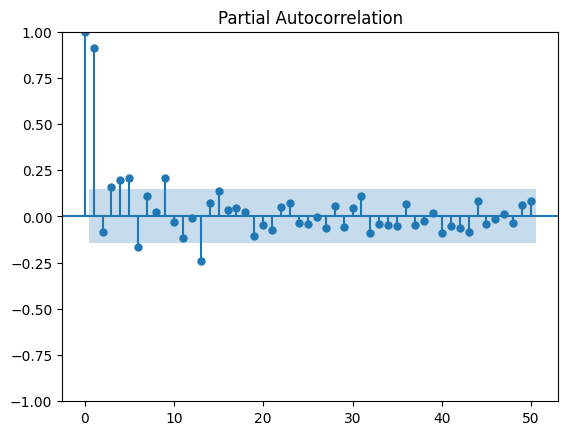

In [39]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
plot_acf(df['Close'], lags=50)
plt.show()

plot_pacf(df['Close'], lags=50)
plt.show()


## Feature engineering

In [40]:
df['Close_Lag_1'] = df['Close'].shift(1)
df.head()

,Open,High,Low,Close,Volume,Close_Lag_1
Date,,,,,,
2024-06-26,61806.01,62487.81,60712.00,60864.99,22485.0,NaN
2024-06-27,60864.98,62389.22,60606.63,61706.47,18344.0,60864.99
2024-06-28,61706.46,62225.31,60063.00,60427.84,24821.0,61706.47
2024-06-29,60427.84,61224.00,60383.77,60986.68,11509.0,60427.84
2024-06-30,60986.68,63058.76,60712.21,62772.01,17326.0,60986.68


In [41]:
df['Close_Lag_1'] = df['Close_Lag_1'].fillna(method='bfill')
df.head()

,Open,High,Low,Close,Volume,Close_Lag_1
Date,,,,,,
2024-06-26,61806.01,62487.81,60712.00,60864.99,22485.0,60864.99
2024-06-27,60864.98,62389.22,60606.63,61706.47,18344.0,60864.99
2024-06-28,61706.46,62225.31,60063.00,60427.84,24821.0,61706.47
2024-06-29,60427.84,61224.00,60383.77,60986.68,11509.0,60427.84
2024-06-30,60986.68,63058.76,60712.21,62772.01,17326.0,60986.68


In [42]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Example with manually specified parameters
model = SARIMAX(df['Close'],
                order=(1, 1, 1),  # Non-seasonal parameters (p=1, d=1, q=1)
                seasonal_order=(1, 1, 1, 2))  # Seasonal parameters (P=1, D=1, Q=1, m=2)

# Fit the model
result = model.fit()

# Show the model summary
result.summary()



C:\Users\SREE GANESHA\anaconda3\envs\automation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\SREE GANESHA\anaconda3\envs\automation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             Close   No. Observations:                  180
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 2)   Log Likelihood               -1802.996
Date:                           Mon, 23 Dec 2024   AIC                           3615.993
Time:                                   16:51:14   BIC                           3631.874
Sample:                               06-26-2024   HQIC                          3622.434
                                    - 12-22-2024                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0225     99.538      0.000      1.000    -195.067     195.112
ma.L1          0.0165     99.464      0.000      1.000    -194.929     194.962
ar.S.L2        0.0259      3.942      0.007      0.995      -7.701       7.752
ma.S.L2       -0.9397      0.120     -7.839      0.000      -1.175      -0.705
sigma2      6.666e+07      0.000   1.94e+11      0.000    6.67e+07    6.67e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3823.12
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               4.12   Skew:                            -0.34
Prob(H) (two-sided):                  0.00   Kurtosis:                        25.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.23e+26. Standard errors may be unstable.
"""

C:\Users\SREE GANESHA\anaconda3\envs\automation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\SREE GANESHA\anaconda3\envs\automation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\SREE GANESHA\anaconda3\envs\automation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\SREE GANESHA\anaconda3\envs\automation\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


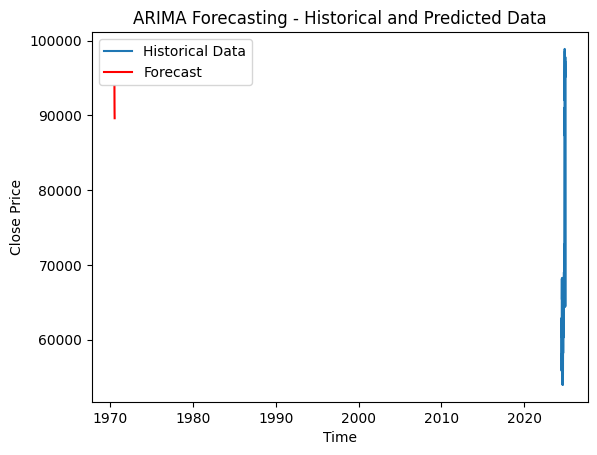

In [43]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import numpy as np

# Manually specify p, d, q (example values)
p = 1  # AR term
d = 1  # Differencing term
q = 1  # MA term

# Fit the ARIMA model
model = ARIMA(df['Close'], order=(p, d, q))
result = model.fit()

# Forecast the next 'n' steps (e.g., forecast next 10 points)
forecast_steps = 10
forecast = result.forecast(steps=forecast_steps)

# Create a time index for the forecasted values (this could be the next 10 months/days/etc.)
forecast_index = np.arange(len(df), len(df) + forecast_steps)

# Plot the historical data
plt.plot(df['Close'], label='Historical Data')

# Plot the forecasted data
plt.plot(forecast_index, forecast, color='red', label='Forecast')

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('ARIMA Forecasting - Historical and Predicted Data')
plt.legend()

# Show the plot
plt.show()


## Sql connection

In [44]:
df.head()

,Open,High,Low,Close,Volume,Close_Lag_1
Date,,,,,,
2024-06-26,61806.01,62487.81,60712.00,60864.99,22485.0,60864.99
2024-06-27,60864.98,62389.22,60606.63,61706.47,18344.0,60864.99
2024-06-28,61706.46,62225.31,60063.00,60427.84,24821.0,61706.47
2024-06-29,60427.84,61224.00,60383.77,60986.68,11509.0,60427.84
2024-06-30,60986.68,63058.76,60712.21,62772.01,17326.0,60986.68


In [45]:
# Reset only the index column
df.reset_index(inplace=True)
df.head()

,Date,Open,High,Low,Close,Volume,Close_Lag_1
0,2024-06-26,61806.01,62487.81,60712.00,60864.99,22485.0,60864.99
1,2024-06-27,60864.98,62389.22,60606.63,61706.47,18344.0,60864.99
2,2024-06-28,61706.46,62225.31,60063.00,60427.84,24821.0,61706.47
3,2024-06-29,60427.84,61224.00,60383.77,60986.68,11509.0,60427.84
4,2024-06-30,60986.68,63058.76,60712.21,62772.01,17326.0,60986.68


In [46]:
import mysql.connector
# Database connection details
db_config = {
    'host': 'localhost',
    'user': 'root',        # Replace with your MySQL username
    'password': 'root',    # Replace with your MySQL password
    'database': 'timeseries'    # Replace with your database name
}

# Connect to the database
connection = mysql.connector.connect(**db_config)
cursor = connection.cursor()

# Create the table if it doesn't exist
table_name = 'bitcoin6months'
create_table_query = f"""
CREATE TABLE IF NOT EXISTS {table_name} (
    Date DATE,
    Open FLOAT,
    High FLOAT,
    Low FLOAT,
     Close FLOAT,
    Volume FLOAT,
    Close_Lag_1 FLOAT
);
"""
cursor.execute(create_table_query)

# Filter required columns from DataFrame
df_to_insert = df[['Date','Open','High','Low','Close','Volume','Close_Lag_1']]

# Insert data from DataFrame into the table
insert_query = f"""
INSERT INTO {table_name} (Date,Open,High,Low,Close,Volume,Close_Lag_1)
VALUES (%s, %s, %s, %s, %s, %s,%s)
"""
data_to_insert = df_to_insert.values.tolist()  # Convert filtered DataFrame to list of tuples
cursor.executemany(insert_query, data_to_insert)

# Commit the transaction and close the connection
connection.commit()
print(f"Data inserted into table '{table_name}' successfully.")

cursor.close()
connection.close()


Data inserted into table 'bitcoin6months' successfully.


In [47]:
#data is now successfully inserted into the table